In [1]:
#! python3
# Data Science - Capstone 1
# Jacob Kovach

import numpy as np, matplotlib.pyplot as plt, pandas as pd, os, math
%matplotlib inline
print('Import Complete')

Import Complete


In [2]:
'''
Summary: 

A common talking point in US politics is the promotion of policies to enforce a livable wage. 
Using data gathered on minimum wages from 1968 to 2017 and rental cost data from 1940 to 2000, 
as well as other data sources I aim calculate on a per year, and per state basis, whether a 
state’s minimum wage (or overriding federal law) provided a wage that constitutes “livable”.

Primary data is included below. Additional sources are cited at the conclusion of this notebook 
and annotated within the text.

Hypothesis and Questions:

In the face of popular opinion, I wanted to see how often minimum wage (either federally or state 
imposed) compares to a “livable wage” by comparing minimum wage to the average median rent in each 
state for each year between 1968 and 2016. Prevailing financial advice generally dictates that 
housing accounts for no more than 1/3rd of an individual’s total gross income. Additionally, the
CPI gives housing a weight of 42% of an individual’s income (unsure whether this is cause or 
effect). Using this metric as a goalpost, I will compare the monthly earnings of a minimum wage 
worker and compare median rent prices as a percentage of earnings.

In this study I want to answer the following questions:
   1. Has the minimum wage historically been a “livable wage” (sufficient to afford housing as 
      either 33% or 42% of wages), and is it currently “livable”?
   2. If minimum wage is not currently “livable”, when did wages begin to diverge from housing 
      affordability? If wages have not been historically “livable” is there significant movement 
      in the disparity between wages and housing costs over time?
   3. Has there been significant movement recently to incite conversation about the sufficiency 
      of wages?

Method:

Because most people making minimum wage are likely renting (vs. owning) their home, I researched 
US census data for median rental prices by state. In this study, I use two sources for median rent 
prices, one from census.gov website (https://www2.census.gov/programs-surveys/decennial/tables/time-series/coh-grossrents/grossrents-adj.txt) 
for data between 1940 and 2000, and one from the Institute for Policy and Social Research at the 
University of Kansas (http://www.ipsr.ku.edu/ksdata/ksah/housing/4house10.pdf) for data from 
2000-2016. Rent prices for 2000 were congruent between both studies, however, while the census.gov 
source adjusted rent prices to year 2000 USD, I am unsure if the KU study did so as well. This 
could have deleterious effects on this study.

Census data for both studies only provided a data point once per decade (1940-2010, 2016). To get 
data for each year in between, data was normalized by taking the change in price between decades 
(yc), and divided by the number of years between data points (yc = (y2-y1)/10). This normalization 
may have on the quality of the data as well.

Minimum wage data exists for 2017 but I was unable to find median rent data for that year.
'''

os.chdir('/Users/JKovach/Documents/test projects')
wage = pd.read_csv('./duptest14_Capstone1/Wage Affordability Data.csv', encoding = "ISO-8859-1")
#print(wage)

# Cool function to get any single year's data
wage_by_year = []
for i in range(1968, 2017):
    wage_by_year.append(wage.loc[lambda yr: wage['Year']==i])
print('Enter a year (1968-2016)') 
year = int(input())
while True:
    if year>=1968 and year<2016:
        print(wage_by_year[year-1968])
        break
    else:
        ('Year not in range.\nEnter a year (1968-2016)')

Enter a year (1968-2016)
1997
      Year                 State      Table_Data Footnote  High.Value  \
1595  1997               Alabama             ...      NaN        0.00   
1596  1997                Alaska            5.25      NaN        5.25   
1597  1997               Arizona             ...      NaN        0.00   
1598  1997              Arkansas         4.25[c]      [c]        4.25   
1599  1997            California            4.75      NaN        4.75   
1600  1997              Colorado            4.75      NaN        4.75   
1601  1997           Connecticut            4.77      NaN        4.77   
1602  1997              Delaware               5      NaN        5.00   
1603  1997  District of Columbia            5.75      NaN        5.75   
1604  1997        Federal (FLSA)          $4.75       NaN        4.75   
1605  1997               Florida             ...      NaN        0.00   
1606  1997               Georgia         3.25(d)      (d)        3.25   
1607  1997           

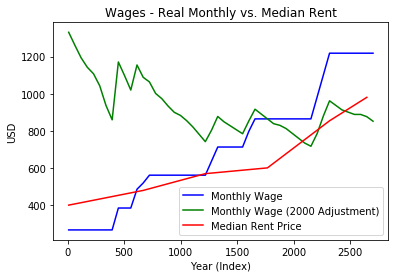

In [3]:
'''
In order to answer the above questions, I first need to create some additional data from the 
datasetabove. First, I adjust the real minimum wage to year 2000 USD equivalents by multiplying 
the real wage numbers by the yearly rate of inflation adjustment[1]. I also created additional 
columns to convert the hourly wage to gross monthly wages by multiplying the real and adjusted 
numbers by 168 (standard full time monthly hours) and a column for percentage, dividing median 
rent by the adjusted monthly wage.
'''

# Create additional columns for dataframe object
wage['High.2000'] = wage['High.Value'] * wage['Rate.Inflation']
wage['Monthly.Wage'] = wage['High.Value'] * 168
wage['Adj.Monthly.Wage'] = wage['High.2000'] * 168
wage['Percent'] = wage['Rent.Median']/wage['Adj.Monthly.Wage']


''' 
Next, I need to establish trends for the national averages. I isolated only the 'Federal (FLSA)' 
values from the dataset and plot the monthly wage, adjusted monthly wage, and median rent prices.
'''

# Plot - wages vs 2000 adjustment for federal
fed_wage_year = wage.loc[wage['State']=='Federal (FLSA)']

plt.plot(fed_wage_year['Monthly.Wage'], color='b', label='Monthly Wage')
plt.plot(fed_wage_year['Adj.Monthly.Wage'], color='g', label='Monthly Wage (2000 Adjustment)')
plt.plot(fed_wage_year['Rent.Median'], color='r', label='Median Rent Price')
plt.xlabel('Year (Index)')
plt.ylabel('USD')
plt.legend(loc='lower right')
plt.title('Wages - Real Monthly vs. Median Rent')
plt.show()

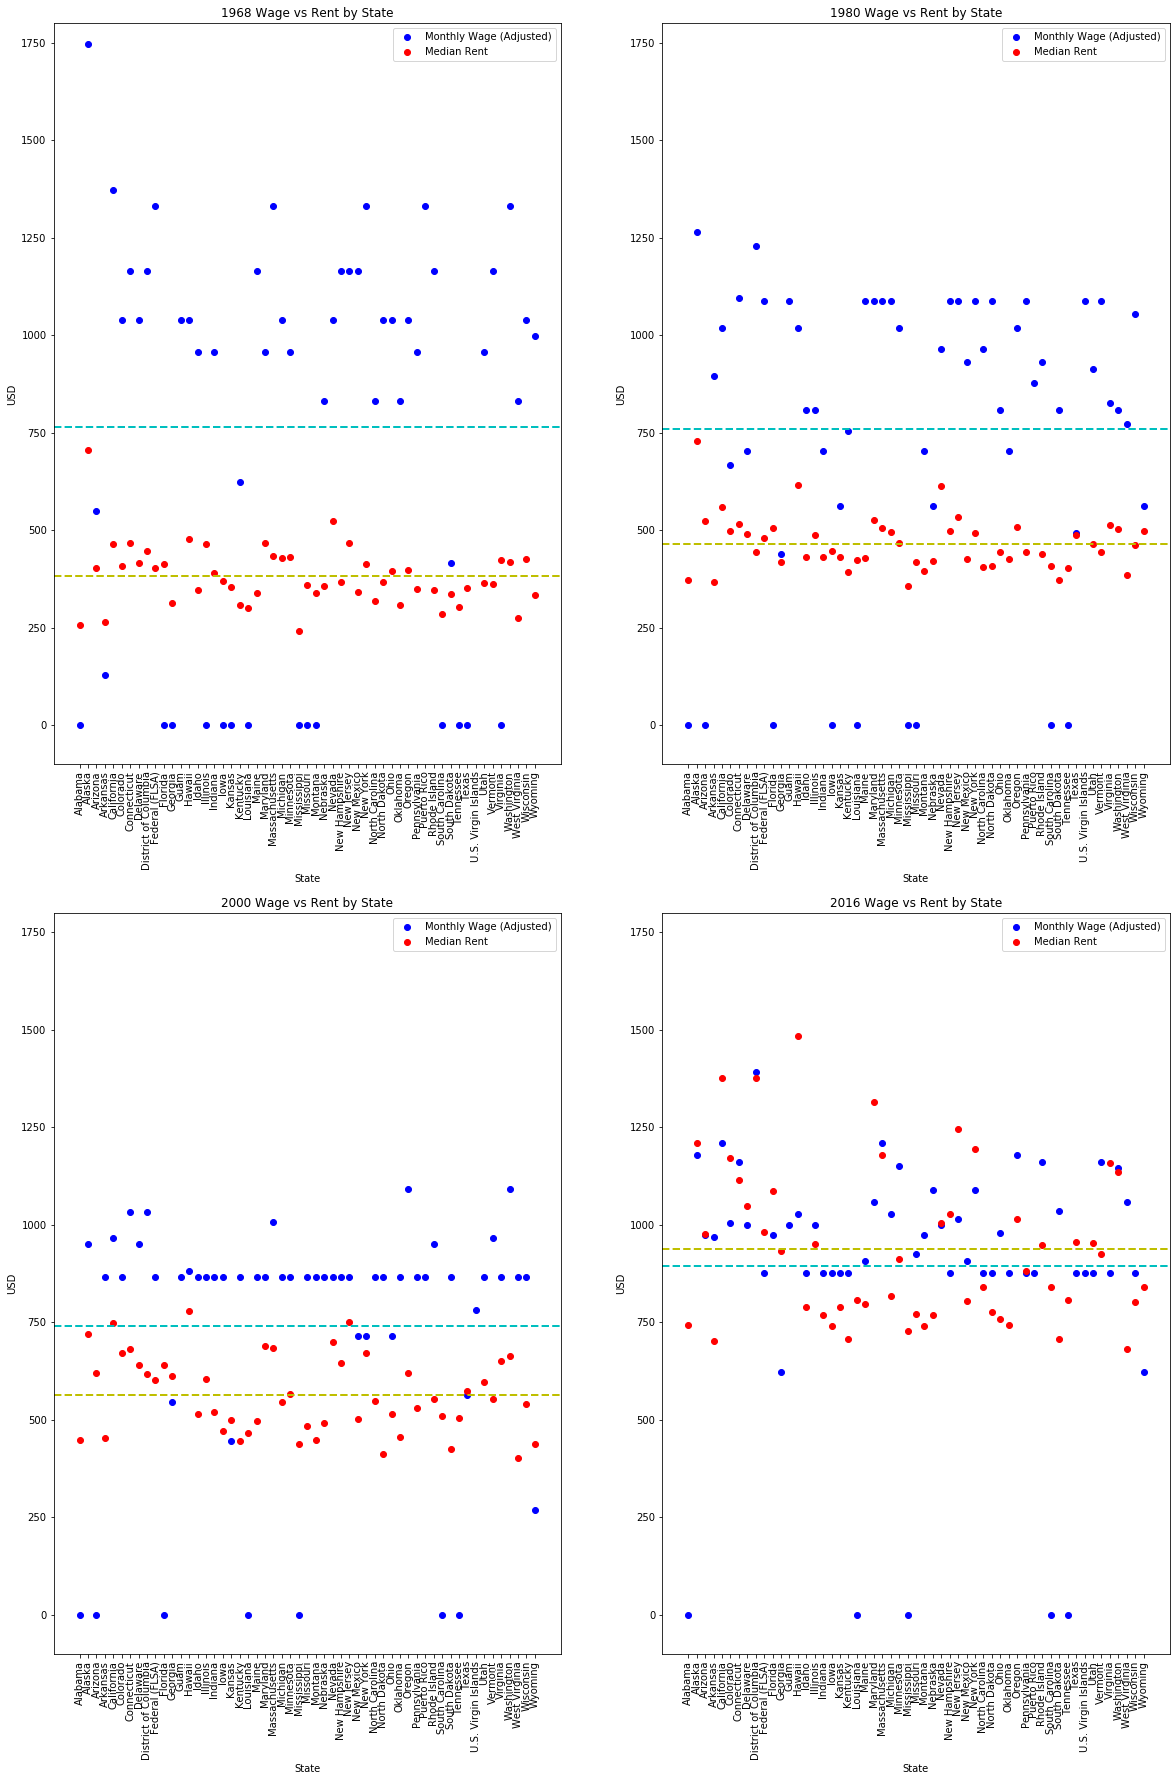

In [4]:
'''
The plot in the cell above compares the real wage (blue) and year 2000 adjusted values (green), to 
the median price of rent (red). This plot clarifies two points: first, it lends credibility to the 
narrative that while real wages have increased, wages adjusted for inflation have fallen over the 
~50 year period, and second (and probably more worrying), while national minimum wage has grown to 
~150% the cost of rent, it is neither sufficient to cover the 33% rule, nor the 42% weight of the 
CPI. 

While this trend is worrying, I wanted to dig deeper into individual states and years. To do this, 
I first created dataframes isolating individuals years throughout the dataset. I plotted the points 
for each year as a scatter representing each state's adjusted monthly wage and median rent.  
'''

# Isolate regular years throughout data
wage_1968 = wage.loc[lambda yr: wage['Year']==1968]
wage_1980 = wage.loc[lambda yr: wage['Year']==1980]
wage_2000 = wage.loc[lambda yr: wage['Year']==2000]
wage_2016 = wage.loc[lambda yr: wage['Year']==2016]

# Create figure and subplots
plt.figure(figsize=(20, 30))

plt.subplot(2,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_1968['State'], y=wage_1968['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_1968['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_1968['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('1968 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylim(-100,1800)

plt.subplot(2,2,2)
plt.scatter(x=wage_1980['State'], y=wage_1980['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_1980['State'], y=wage_1980['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_1980['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_1980['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('1980 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylim(-100,1800)

plt.subplot(2,2,3)
plt.scatter(x=wage_2000['State'], y=wage_2000['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_2000['State'], y=wage_2000['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_2000['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_2000['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('2000 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylim(-100,1800)

plt.subplot(2,2,4)
plt.scatter(x=wage_2016['State'], y=wage_2016['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_2016['State'], y=wage_2016['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_2016['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_2016['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('2016 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylim(-100,1800)

plt.show()

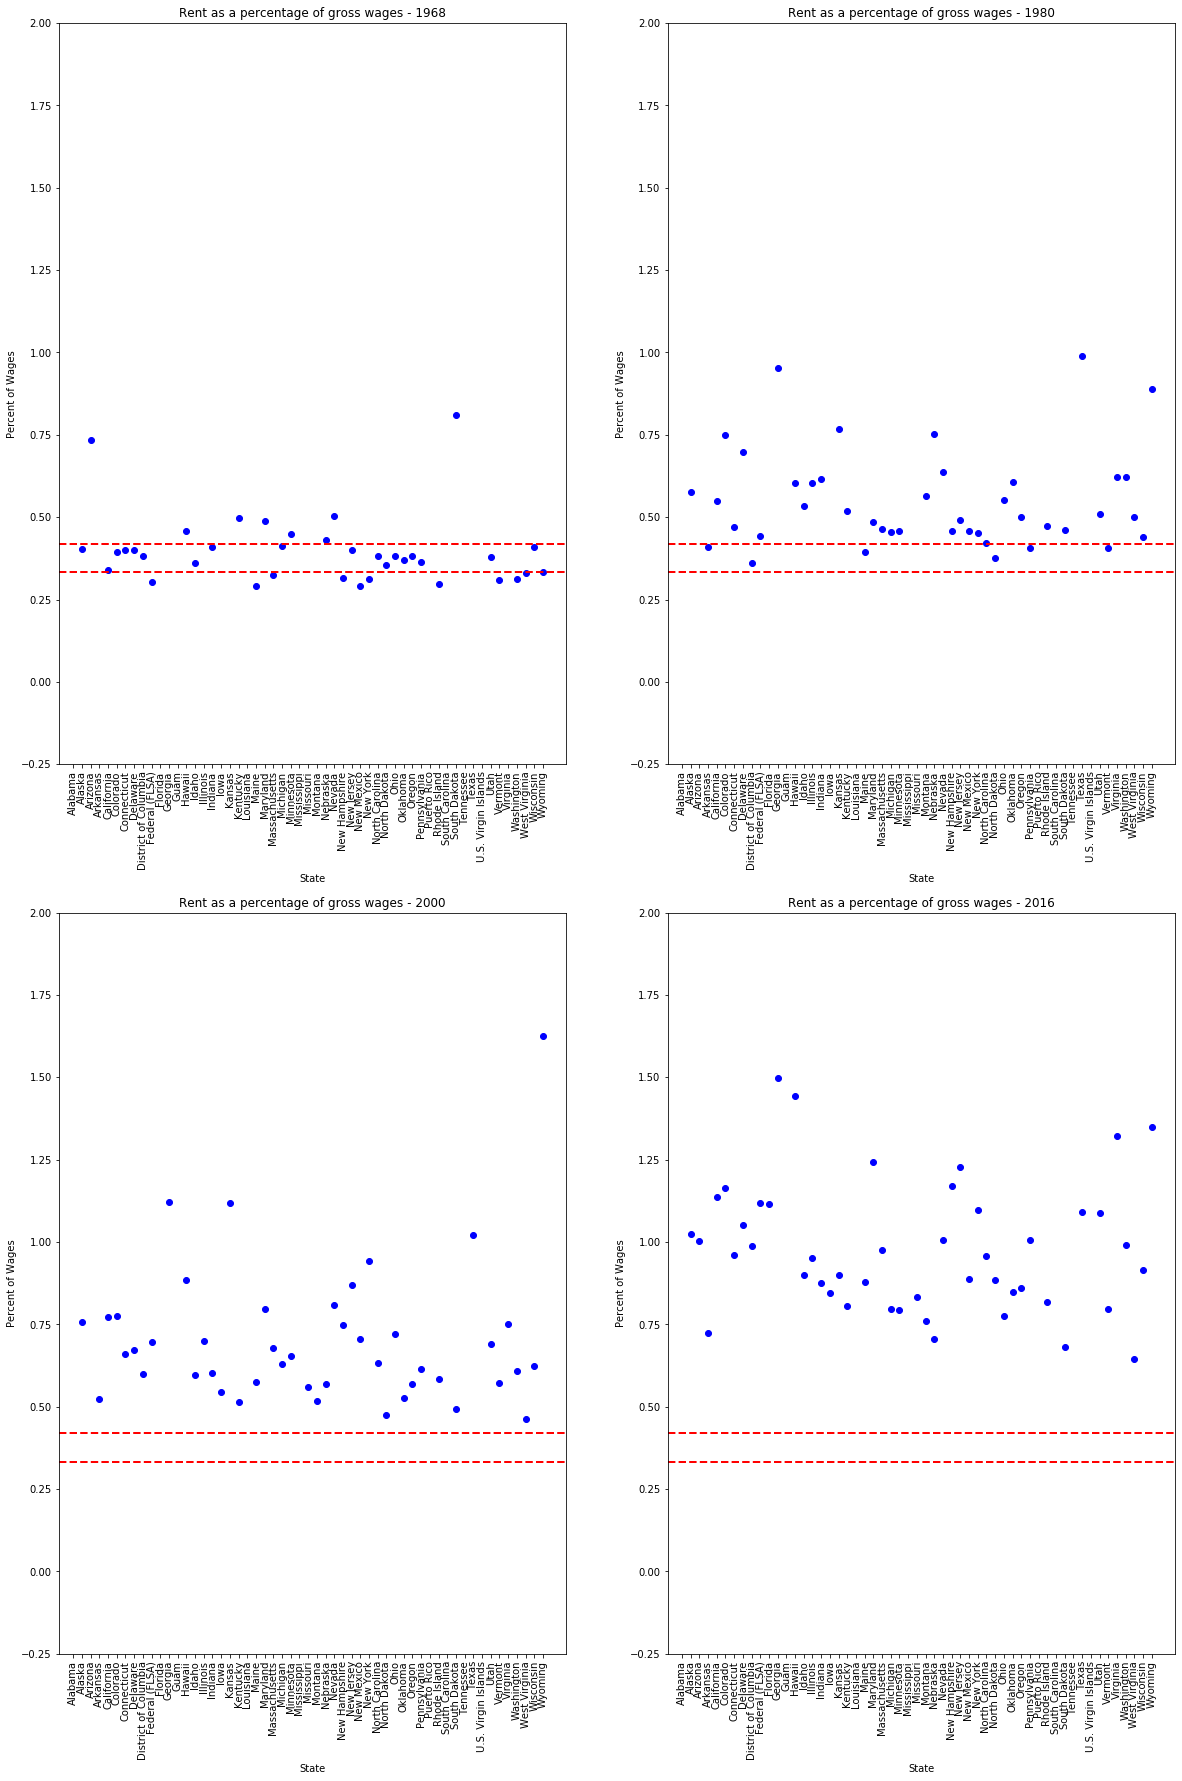

In [5]:
'''
In the above scatter plots, the picture of the initial question becomes bit more clear. We can 
easily see in the 1968 scatter plot, wages are two to three times the median rent for many states 
and the average wage is nearly double the average cost of rent. However, by 2016, while the average 
wage did increase, the average rent prices quickly approached 100% or more of that wage.

Next, I want to see the same scatter plots equalized for percentages of rent, in accordance with 
the initial question of this study. To do so, I use the column created earlier of rent as a 
percentage of adjusted monthly wage and plot the data for each state, noting the 33% and 42% lines.
'''
plt.figure(figsize=(20,30))

plt.subplot(2,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Percent'], color='b')
plt.title('Rent as a percentage of gross wages - 1968')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(-0.25,2)

plt.subplot(2,2,2)
plt.title('Rent as a percentage of gross wages - 1980')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.scatter(x=wage_1980['State'], y=wage_1980['Percent'], color='b')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(-0.25,2)

plt.subplot(2,2,3)
plt.title('Rent as a percentage of gross wages - 2000')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.scatter(x=wage_2000['State'], y=wage_2000['Percent'], color='b')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(-0.25,2)

plt.subplot(2,2,4)
plt.scatter(x=wage_2016['State'], y=wage_2016['Percent'], color='b')
plt.title('Rent as a percentage of gross wages - 2016')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(-0.25,2)

plt.show()

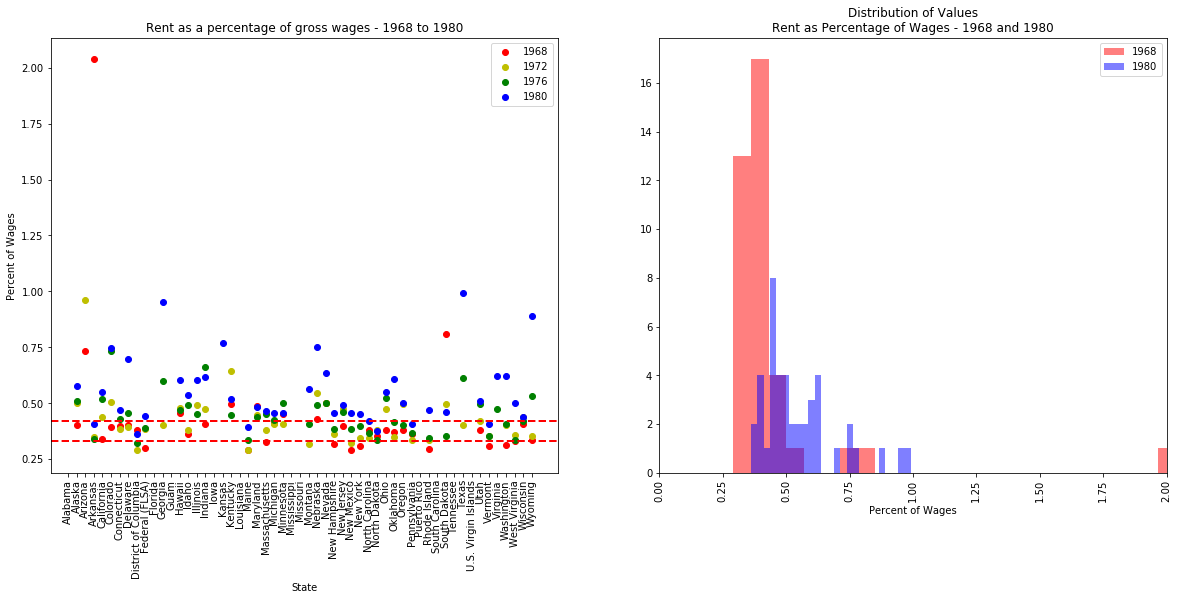

In [12]:
'''
The above charts help to clarify two points. First, they confirm the findings of the original 
question, that rent has quickly grown away from the two points of affordability, as by 2016, even 
the lowest state's median is greater than 60% of minimum monthly wages. Second, they suggest an 
answer to our second questions, that this disparity is not necessarily new but has been the case 
since at least as far back as 1980 (given that most states fell below 42% and many below 33% as 
well).
'''

# Create dataframes intermittently from 1968 through 1980
wage_1972 = wage.loc[lambda yr: wage['Year']==1972]
wage_1976 = wage.loc[lambda yr: wage['Year']==1976]

# Remove infinite and NaN values from dataset
fix_68 = wage_1968['Percent'].replace(np.inf, np.nan).dropna(how='all')
fix_80 = wage_1980['Percent'].replace(np.inf, np.nan).dropna(how='all')

# Plot '68 to '80 datapoints to single scatter
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Percent'], color='r', label='1968')
plt.scatter(x=wage_1972['State'], y=wage_1972['Percent'], color='y', label='1972')
plt.scatter(x=wage_1976['State'], y=wage_1976['Percent'], color='g', label='1976')
plt.scatter(x=wage_1980['State'], y=wage_1980['Percent'], color='b', label='1980')
plt.title('Rent as a percentage of gross wages - 1968 to 1980')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

# Plot Distribution of Values
plt.subplot(1,2,2)
plt.hist(fix_68, bins=25, color='r', alpha=.5, label='1968')
plt.hist(fix_80, bins=25, color='b', alpha=.5, label='1980')
plt.xlabel('Percent of Wages')
plt.title('Distribution of Values\nRent as Percentage of Wages - 1968 and 1980')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.xlim(0,2)

plt.show()

In [7]:
'''
Again, the scatter plot above confirms the answer to our second question, that while wages in 1968 
were generally sufficient to constitute a "livable" wage, by 1980 the majority of states had a 
median rent greater than 42% of monthly wages. While this doesn't necessarily demonstrate a wage 
crisis, it does indicate that stagnation of wages may not be a recent trend, possibly going as far 
back as 1976-1980. 

To determine if difference in these years is significant, I perform a t-test for 1980 and 1968 
percentage.
'''
# Calculate difference of means
y = fix_80.mean() - fix_68.mean()

# Calculate difference of standard error and print t-value
size = np.array([len(fix_68), len(fix_80)])
sd = np.array([fix_68.std(), fix_80.std()])
diff_se = (sum(sd**2/size))**0.5
t_value = y/diff_se
print(t_value)

from scipy.stats import ttest_ind
print(ttest_ind(fix_80, fix_68, equal_var=False))

2.1222971423884203
Ttest_indResult(statistic=2.1222971423884203, pvalue=0.03840739094340589)


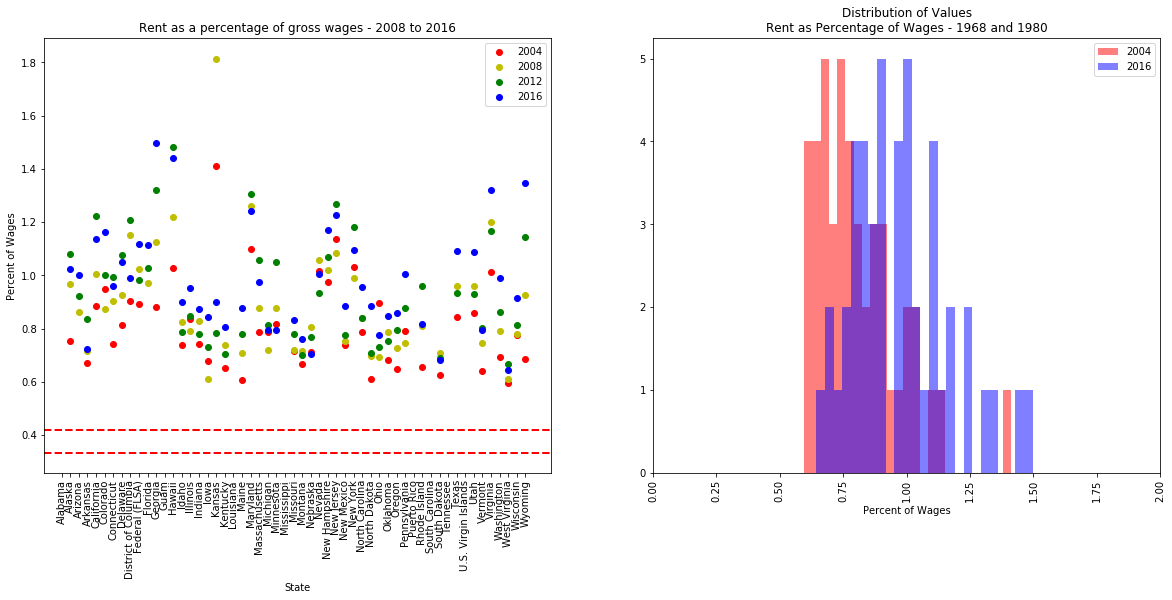

In [11]:
'''
Based on the resultant p and t-values, we can conclude that the change in values between 1968 and 
1980 is statistically significant rather than a result of normal variance.

For the third question, I repeated this process using a similar and more recent 12-year period 
from 2004-2016 to determine if the between these two years is of a greater or lesser magnitude 
than the earlier change in the 1968-1980 period.
'''

# Dataframe for '04, '08, and '12
wage_2004 = wage.loc[lambda yr: wage['Year']==2004]
wage_2008 = wage.loc[lambda yr: wage['Year']==2008]
wage_2012 = wage.loc[lambda yr: wage['Year']==2012]

# Fix dataframe
fix_04 = wage_2004['Percent'].replace(np.inf, np.nan).dropna(how='all')
fix_16 = wage_2016['Percent'].replace(np.inf, np.nan).dropna(how='all')

# Plot '04-'16 scatter and histogram
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(x=wage_2004['State'], y=wage_2004['Percent'], color='r', label='2004')
plt.scatter(x=wage_2008['State'], y=wage_2008['Percent'], color='y', label='2008')
plt.scatter(x=wage_2012['State'], y=wage_2012['Percent'], color='g', label='2012')
plt.scatter(x=wage_2016['State'], y=wage_2016['Percent'], color='b', label='2016')
plt.title('Rent as a percentage of gross wages - 2008 to 2016')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.hist(fix_04, bins=25, color='r', alpha=.5, label='2004')
plt.hist(fix_16, bins=25, color='b', alpha=.5, label ='2016')
plt.xlabel('Percent of Wages')
plt.title('Distribution of Values\nRent as Percentage of Wages - 1968 and 1980')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.xlim(0,2)

plt.show()

In [9]:
'''
Looking at these plots, we see that the rent as a percentage figure risen to higher levels in 
recent years. The distribution of values appears relatively similar (albeit at shifted upward). 
To determine if this is true, we run another t-test...
'''

# Calculate t and p values
print(fix_04.mean())
print(fix_16.mean())
y = fix_16.mean() - fix_04.mean()
size = np.array([len(fix_16), len(fix_04)])
sd = np.array([fix_16.std(), fix_04.std()])
diff_se = (sum(sd**2/size))**0.5
t_value = y/diff_se
print(t_value)

from scipy.stats import ttest_ind
print(ttest_ind(fix_16, fix_04, equal_var=False))

0.8108678178587905
0.9765727506036413
4.373056564240831
Ttest_indResult(statistic=4.373056564240831, pvalue=3.320502330846128e-05)


In [ ]:
'''
... and find that the t-value is larger than our initial group, indicating that the magnitude of 
the difference has increased and the p-value is smaller, and thus the non-normal variance between 
the later group is greater.

Conclusion: 

Based on the data provided above, it appears that because increases in rent prices have outpaced 
increases in minimum wage, the percentage of wages which a minimum wage worker pays in rent is 
higher in recent years. We can also infer that, prior to 1968, monthly minimum wage provided a 
livable wage in most states, but had grown away from affordability by 1980. Because our t-value is 
larger for the '04-'16 set we can say that the rent as a percentage of wages has likely increased 
more drastically in recent years, although both sets indicate a clear statistical difference 
between them. Because of this, we can infer that wages diverged from "livable" between 1968 and 
1980. In regards to the final question of this study, it appears that the movement of percentage 
of rent has become more unfavorable for the earner between 2004 and 2016 than it was between 1968
and 1980. 

As a follow up to this study, it would be interesting to chart t-values year to year and note the 
changes. Plotting these points would give us a better understanding of the degree to which changes 
in relative affordability are occurring and allow us to determine the overall trend in this 
relationship. Additionally, performing this study with additional data points such as minimum wage 
spending on food, transportation, entertainment, etc. and determining affordability with these 
points considered.

Sources:

[1] 2000-2016 Median Rent Data - http://www.ipsr.ku.edu/ksdata/ksah/housing/4house10.pdf
[2] 1940-2000 Median Rent Data - https://www2.census.gov/programs-surveys/decennial/tables/time-series/coh-grossrents/grossrents-adj.txt
[3] 1968-2017 Minimum Wage Data - https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017
[4] Weight of Housing as a Percent of Income - https://www.bls.gov/cpi/tables/relative-importance/2016.pdf
[5] 1968-2016 Inflation Numbers - https://www.usinflationcalculator.com/

'''